# Random Walks
##### Gabriel Lima Barros - 2020006531
##### Gabriel Teixeira Carvalho - 2020006558
##### Thiago Pádua de Carvalho - 2020007066

### Introdução
Nesta atividade iremos explorar através de experimentos computacionais algumas das principais
características de caminhadas aleatórias. Para isso, iremos gerar caminhadas aleatórias em uma ou duas dimensões e analisar algumas de suas propriedades através de ensembles, estatísticas e visualizações.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

1. (a) Escreva uma rotina para gerar caminhadas aleatórias de N passos em d (=1 ou 2) dimensões, com cada passo tendo comprimento uniformemente distribuído
no intervalo (-1/2, 1/2) em cada dimensão. (Primeiro, gere os passos como um
array N x d e, então, faça uma soma cumulativa.) Faça um gráfico de Xt por t
para poucas caminhadas de 10.000 passos, onde Xt é a posição do caminhante
após t passos

In [15]:
def generate_random_walk(N, d):
  random_walk = np.random.rand(N, d)
  random_walk -= 0.5
  cum_sum = np.cumsum(random_walk, axis=0)
  return cum_sum

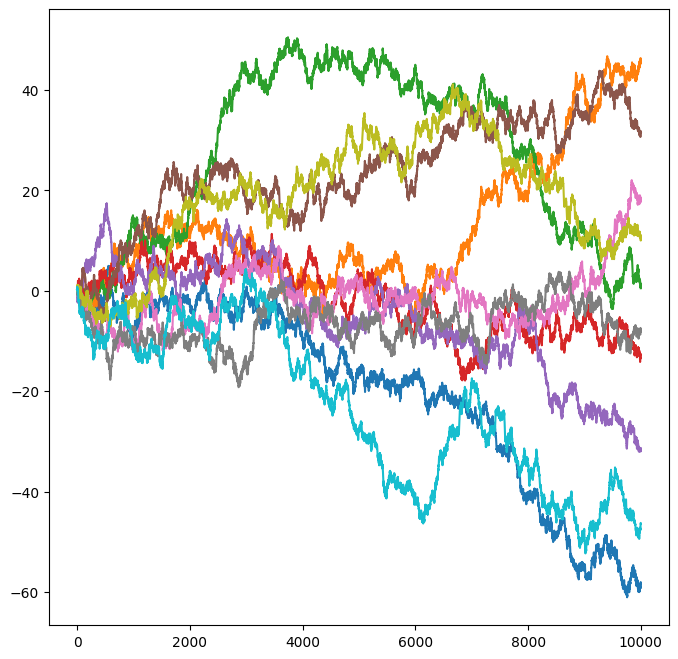

In [16]:
np.random.seed(42)
plt.figure(figsize=(8,8))

for i in range(10):
  random_walk = generate_random_walk(10000, 1)
  plt.plot(random_walk)

1. (b) Faça um gráfico de x por y para poucas caminhadas aleatórias bidimensionais
com N = 10, 1.000, e 100.000 (tente manter a razão de aspecto do gráfico XY em
um.) Se você multiplicar o número de passo por 100, a distância final da
caminhada aumenta por cerca de 10 vezes?

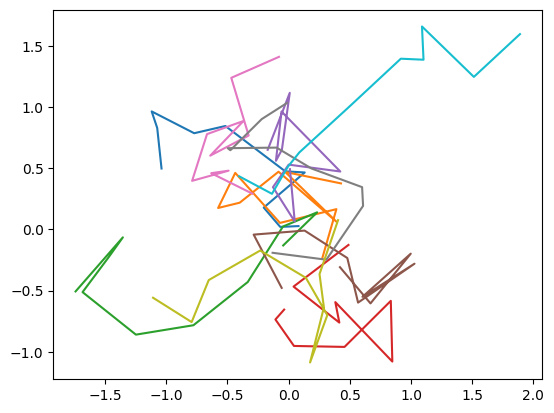

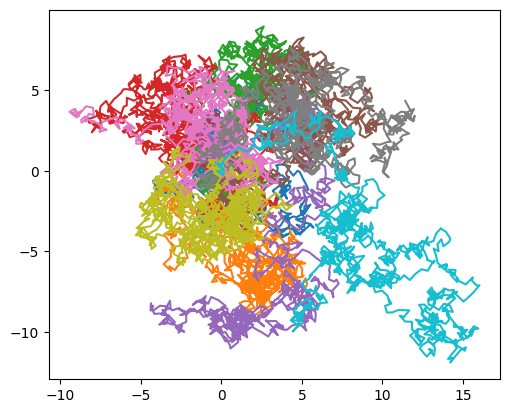

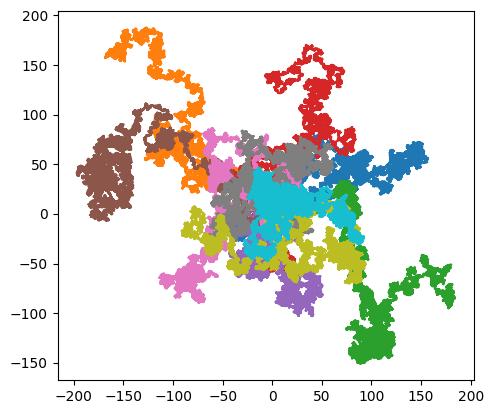

In [17]:
for i in range(3):
  fig, ax = plt.subplots()
  ax.set_aspect('equal')
  for j in range(10):
    random_walk = generate_random_walk(10 * (100 ** i), 2)
    ax.plot(random_walk[:,0], random_walk[:,1])


2. Escreva uma rotina para determinar os pontos finais de W caminhadas aleatórias
com N passos cada em d=2 dimensões. Faça um gráfico de dispersão das
coordenadas finais de 10.000 caminhadas aleatórias com N=1 e 10, superpostos no
mesmo gráfico. Perceba que as caminhadas longas estão distribuídas em um
padrão simétrico e circular, enquanto as caminhadas de um único passo têm uma
distribuição de probabilidades quadrada.

In [18]:
def get_final_points(W, N, d):
  final_points = []
  
  for _ in range(W):
    random_walk = generate_random_walk(N, d)
    final_points.append(random_walk[-1])
  
  final_points = np.array(final_points)

  return final_points

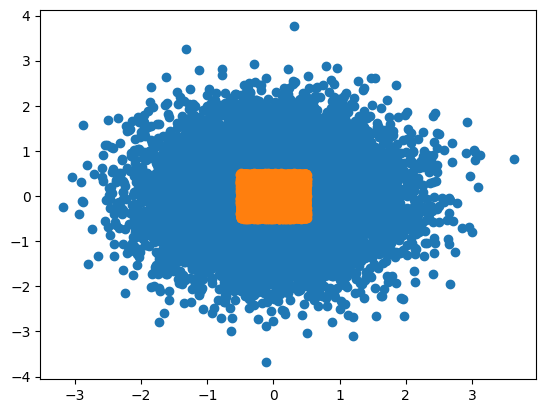

In [19]:
final_points = get_final_points(10000, 1, 2)
final_points10 = get_final_points(10000, 10, 2)

plt.scatter(final_points10[:, 0], final_points10[:, 1])
plt.scatter(final_points[:, 0], final_points[:, 1])

(c) Calcule o desvio quadrático médio (RMS), a para passos uniformemente distribuidos
no intervalo (-1/2, 1/2) em uma dimensão. Escreva uma rotina que plota um histograma
dos pontos finais de W caminhadas aleatórias com N passos e 50 caixas (bins), junto com
a previsão da equação acima para x no intervalo (−3 * sigma, 3 * sigma). Faça um histograma com
W=10.000 e N=1, 2, 3 e 5. Quão rápido a distribuição Gaussiana se torna uma boa
aproximação para uma caminhada aleatória?

In [64]:
def plot_histogram(W, N, d):
  final_points = get_final_points(W, N, d)
  
  sigma = np.std(final_points)
  alpha = sigma / np.sqrt(N)
  predict = np.random.normal(0, sigma)
  plt.hist(final_points, bins=50)
  plt.axvline(predict, color='red', linestyle='dashed', linewidth=2)
  plt.title(f'N = {N}, alpha = {alpha:.4f}, predict = {predict:.4f}')
  plt.show()

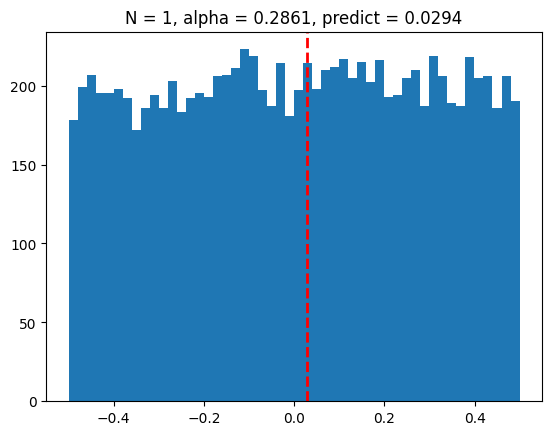

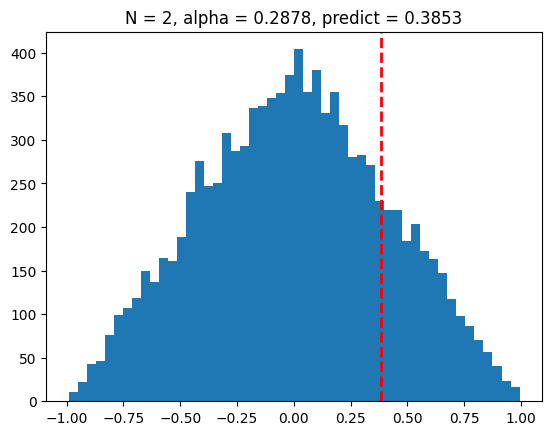

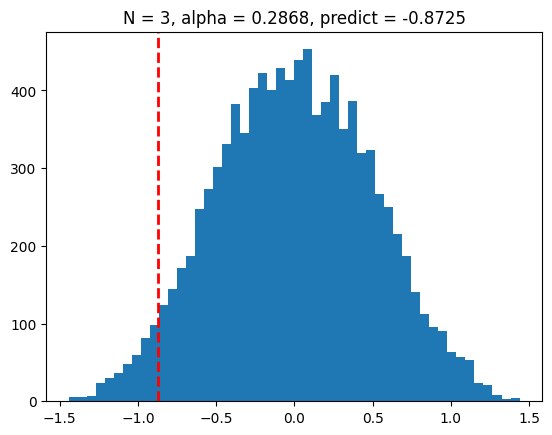

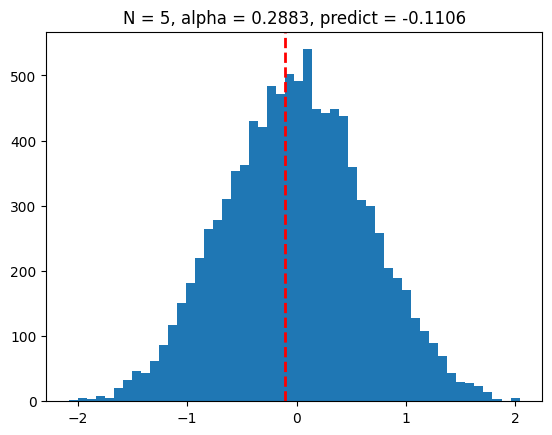

In [65]:
plot_histogram(10000, 1, 1)
plot_histogram(10000, 2, 1)
plot_histogram(10000, 3, 1)
plot_histogram(10000, 5, 1)